In [4]:
%matplotlib inline 


In [7]:
import pandas as pd 
import numpy as np 
import statistics as st 
import matplotlib.pyplot as plt 


In [22]:
# Import the data 
city_data_df = pd.read_csv("Resources/city_data.csv")
ride_data_df = pd.read_csv("Resources/ride_data.csv")
ride_data_df.head(10)


,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.739410e+12
1,South Michelleport,2019-03-04 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2019-02-24 4:29,33.44,2.005070e+12
3,Rodneyfort,2019-02-10 23:22,23.44,5.149250e+12
4,South Jack,2019-03-06 4:28,34.58,3.908450e+12
5,South Latoya,2019-03-11 12:26,9.52,1.995000e+12
6,New Paulville,2019-02-27 11:17,43.25,7.932080e+11
7,Simpsonburgh,2019-04-26 0:43,35.98,1.119540e+11
8,South Karenland,2019-01-08 3:28,35.09,7.995620e+12
9,North Jasmine,2019-03-09 6:26,42.81,5.327640e+12


In [10]:
city_data_df.head(10)


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [11]:
city_data_df.count()


city            120
driver_count    120
type            120
dtype: int64

In [12]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [14]:
# Determine types of data in each column 

city_data_df.dtypes


city            object
driver_count     int64
type            object
dtype: object

In [16]:
# Get the Unique data points using unique()

city_data_df["type"].unique()


array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [18]:
# Obtain number of points for each type 

sum(city_data_df["type"]=="Rural")


18

In [19]:
ride_data_df.count()


city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [20]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [21]:
ride_data_df.dtypes


city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [27]:
# Merge the two dataframes

combined_df = pd.merge(ride_data_df, city_data_df, how ='left', on =["city", "city"])

combined_df.head(10)


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06 4:28,34.58,3.908450e+12,46,Urban
5,South Latoya,2019-03-11 12:26,9.52,1.995000e+12,10,Urban
6,New Paulville,2019-02-27 11:17,43.25,7.932080e+11,44,Urban
7,Simpsonburgh,2019-04-26 0:43,35.98,1.119540e+11,21,Urban
8,South Karenland,2019-01-08 3:28,35.09,7.995620e+12,4,Urban
9,North Jasmine,2019-03-09 6:26,42.81,5.327640e+12,33,Urban


In [28]:
combined_df.count()


city            2375
date            2375
fare            2375
ride_id         2375
driver_count    2375
type            2375
dtype: int64

In [29]:
# Creating Urban df

urban_cities_df = combined_df[combined_df["type"]=="Urban"]
urban_cities_df.head(10)


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06 4:28,34.58,3.908450e+12,46,Urban
5,South Latoya,2019-03-11 12:26,9.52,1.995000e+12,10,Urban
6,New Paulville,2019-02-27 11:17,43.25,7.932080e+11,44,Urban
7,Simpsonburgh,2019-04-26 0:43,35.98,1.119540e+11,21,Urban
8,South Karenland,2019-01-08 3:28,35.09,7.995620e+12,4,Urban
9,North Jasmine,2019-03-09 6:26,42.81,5.327640e+12,33,Urban


In [31]:
# Creating Rural df

rural_cities_df = combined_df[combined_df["type"]=="Rural"]
rural_cities_df.head(10)

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13,43.22,1.076080e+12,9,Rural
2251,North Holly,2019-02-02 14:54,12.42,1.985260e+12,8,Rural
2252,Michaelberg,2019-03-27 18:27,54.85,4.421840e+12,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12,47.90,3.269650e+12,2,Rural
2254,Lake Latoyabury,2019-05-06 8:57,51.80,4.018030e+12,2,Rural
2255,Taylorhaven,2019-04-06 1:01,45.31,2.275360e+12,1,Rural
2256,Garzaport,2019-02-18 18:27,36.16,2.928340e+12,7,Rural
2257,New Ryantown,2019-01-27 17:33,42.68,7.994600e+12,2,Rural
2258,Lake Latoyabury,2019-04-02 21:00,13.46,8.232860e+12,2,Rural
2259,North Holly,2019-02-16 17:02,39.46,4.571480e+12,8,Rural


In [32]:
# Creating Urban df

suburban_cities_df = combined_df[combined_df["type"]=="Suburban"]
suburban_cities_df.head(10)

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 3:08,27.79,6.653620e+12,11,Suburban
1626,East Kentstad,2019-04-07 19:44,18.75,6.575960e+12,20,Suburban
1627,Lake Omar,2019-01-17 21:33,21.71,9.669120e+11,22,Suburban
1628,Myersshire,2019-02-27 17:38,17.10,5.706770e+12,19,Suburban
1629,West Hannah,2019-04-19 1:06,37.78,2.273050e+12,12,Suburban
1630,East Marymouth,2019-03-29 8:36,37.60,6.370860e+12,5,Suburban
1631,New Raymond,2019-02-25 21:40,20.44,5.984510e+12,17,Suburban
1632,Lake Robertside,2019-01-11 20:17,46.51,6.574330e+12,4,Suburban
1633,Josephside,2019-03-30 9:45,44.74,5.592690e+12,25,Suburban
1634,Brandonfort,2019-01-14 12:35,28.02,8.100260e+12,10,Suburban


In [54]:
urban_ride_count = urban_cities_df.groupby("city").count()["ride_id"]

suburban_ride_count = suburban_cities_df.groupby("city").count()["ride_id"]

rural_ride_count = rural_cities_df.groupby("city").count()["ride_id"]

urban_ride_count
len(suburban_ride_count)


36

In [55]:
urban_average_fare = urban_cities_df.groupby("city").mean()["fare"]
urban_average_fare.head()


city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [56]:
# Find Average Fare Costs 

rural_average_fare = rural_cities_df.groupby("city").mean()["fare"]
suburban_average_fare = suburban_cities_df.groupby("city").mean()["fare"]
len(suburban_average_fare)


36

In [57]:
# Find average Driver Count 

urban_average_driver = urban_cities_df.groupby("city").mean()["driver_count"]
urban_average_driver.head()

city
Amandaburgh        12
Barajasview        26
Carriemouth        52
Christopherfurt    41
Deanville          49
Name: driver_count, dtype: int64

In [58]:
# Find average driver count
suburban_average_driver = suburban_cities_df.groupby("city").mean()["driver_count"]
rural_average_driver = rural_cities_df.groupby("city").mean()["driver_count"]
len(suburban_average_driver)


36

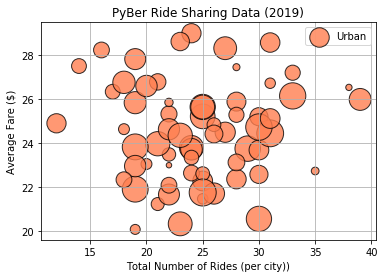

In [59]:
# Create Scatter Plot
    
plt.scatter(urban_ride_count, urban_average_fare, s = 10*urban_average_driver, c = "coral", edgecolor = "black", linewidths = 1, 
            alpha = 0.8, label = "Urban") 
plt.title("PyBer Ride Sharing Data (2019)") 
plt.ylabel("Average Fare ($)") 
plt.xlabel("Total Number of Rides (per city))") 
plt.grid(True) 
plt.legend()


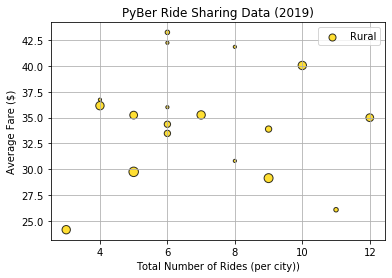

In [63]:
plt.scatter(rural_ride_count, rural_average_fare, s = 10*rural_average_driver, c = "gold", edgecolor = "black", linewidths = 1, 
            alpha = 0.8, label = "Rural") 
plt.title("PyBer Ride Sharing Data (2019)") 
plt.ylabel("Average Fare ($)") 
plt.xlabel("Total Number of Rides (per city))") 
plt.grid(True) 
plt.legend()


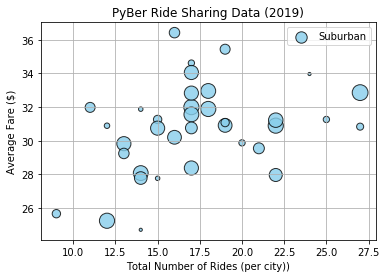

In [65]:
plt.scatter(suburban_ride_count, suburban_average_fare, s = 10*suburban_average_driver, c = "skyblue", edgecolor = "black", linewidths = 1, 
            alpha = 0.8, label = "Suburban") 
plt.title("PyBer Ride Sharing Data (2019)") 
plt.ylabel("Average Fare ($)") 
plt.xlabel("Total Number of Rides (per city))") 
plt.grid(True) 
plt.legend()

In [81]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

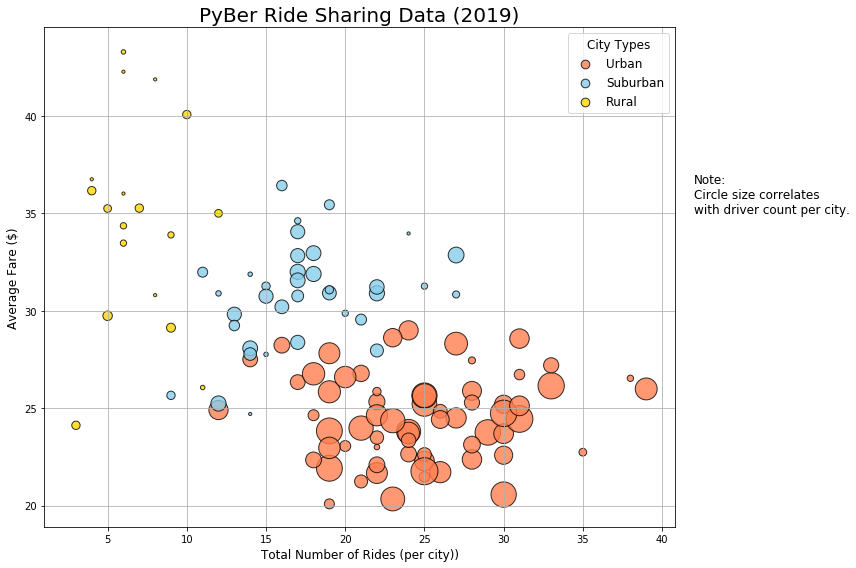

In [82]:
plt.subplots(figsize=(12,8))

plt.scatter(urban_ride_count, urban_average_fare, s = 10*urban_average_driver, c = "coral", edgecolor = "black", linewidths = 1, 
            alpha = 0.8, label = "Urban") 
plt.scatter(suburban_ride_count, suburban_average_fare, s = 10*suburban_average_driver, c = "skyblue", edgecolor = "black", linewidths = 1, 
            alpha = 0.8, label = "Suburban") 
plt.scatter(rural_ride_count, rural_average_fare, s = 10*rural_average_driver, c = "gold", edgecolor = "black", linewidths = 1, 
            alpha = 0.8, label = "Rural") 
# Adding note 
plt.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city.", fontsize="12")

plt.title("PyBer Ride Sharing Data (2019)", fontsize = 20) 
plt.ylabel("Average Fare ($)", fontsize = 12) 
plt.xlabel("Total Number of Rides (per city))", fontsize = 12) 
plt.grid(True) 
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
plt.savefig('analysis/Fig1.png')
